In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample

df = pd.read_csv("C:\\Users\\Shatrujeet\\Downloads\\g\\spam.csv", encoding='latin1')

df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df = df[['label', 'message']]

df.dropna(inplace=True)

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

ham = df[df.label == 0]
spam = df[df.label == 1]

spam_upsampled = resample(spam,
                          replace=True,
                          n_samples=len(ham),
                          random_state=42)

df_balanced = pd.concat([ham, spam_upsampled])

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['message'], df_balanced['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

def predict_message(message):
    vec = vectorizer.transform([message])
    pred = model.predict(vec)[0]
    return "Spam" if pred == 1 else "Ham"

print(predict_message("Congratulations! You've won a free cruise!"))
print(predict_message("Hello, I am a Nigerian Prince"))
print(predict_message("Hey, are we still on for lunch tomorrow?"))


Accuracy: 0.9922279792746114
Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       985
        Spam       0.99      0.99      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930

Spam
Ham
Ham


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np


In [26]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)


C:\Users\Shatrujeet\AppData\Local\Temp\ipykernel_19008\94860637.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spam_scores, y=top_spam_words, palette="autumn")


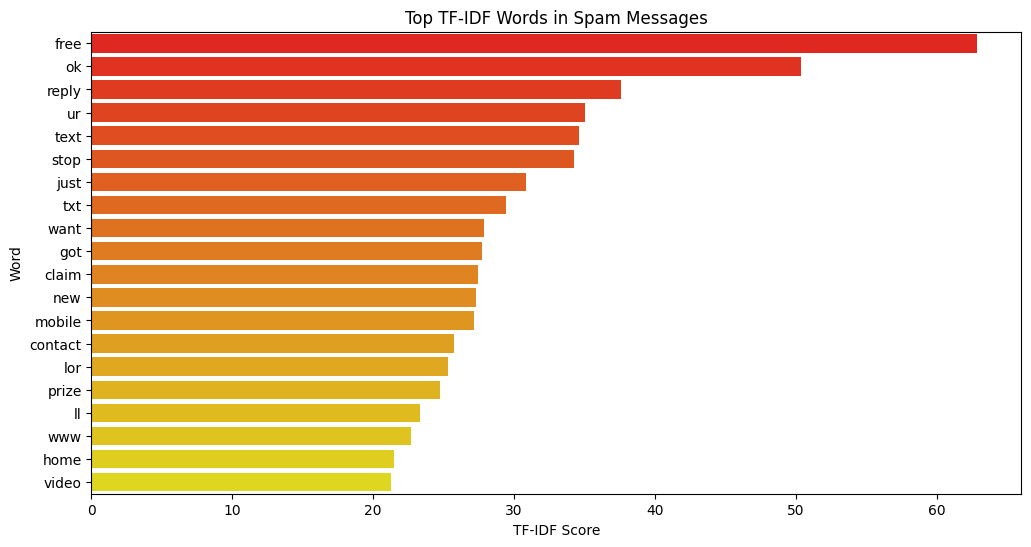

In [27]:
# Get words and tf-idf values
feature_names = np.array(vectorizer.get_feature_names_out())

# Select only spam rows from training data
spam_indices = y_train[y_train == 1].index
spam_tfidf = X_train_vec[spam_indices]

# Sum TF-IDF values across all spam messages
spam_word_scores = np.asarray(spam_tfidf.sum(axis=0)).flatten()

# Get top N spam words
top_n = 20
top_spam_indices = spam_word_scores.argsort()[-top_n:][::-1]
top_spam_words = feature_names[top_spam_indices]
top_spam_scores = spam_word_scores[top_spam_indices]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_spam_scores, y=top_spam_words, palette="autumn")
plt.title("Top TF-IDF Words in Spam Messages")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.show()
